# Classification de l'Iris avec SVM et Visualisation des Frontières de Décision - Ewan Vidal

Ce notebook applique un **Support Vector Machine (SVM)** avec un noyau **RBF** sur le dataset **Iris**, en utilisant uniquement les **deux premières caractéristiques** pour permettre une visualisation des frontières de décision.

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 1. Chargement du Dataset Iris  
Le dataset **Iris** contient des informations sur trois espèces de fleurs (*Setosa, Versicolor, Virginica*).  
Nous sélectionnons uniquement les **deux premières caractéristiques** pour permettre une représentation graphique.

In [158]:
# Chargement de la base de données Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend seulement les deux premières caractéristiques pour la visualisation
y = iris.target

## 2. Normalisation des Données  
Nous appliquons une **normalisation standard** (`StandardScaler`) pour s'assurer que les caractéristiques ont une moyenne de **0** et un écart-type de **1**, ce qui améliore la convergence du modèle SVM.

In [159]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 3. Séparation en Entraînement et Test  
Nous divisons les données en un **ensemble d'entraînement (80%)** et un **ensemble de test (20%)** à l’aide de `train_test_split()`, afin d'évaluer la performance du modèle sur des données non vues.

In [160]:
# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4. Entraînement du Modèle SVM  
Nous entraînons un **SVM avec un noyau RBF** (`SVC(kernel='rbf')`), qui est adapté aux données non linéairement séparables.  
Nous utilisons **C=10** (contrôle la marge de décision) et **gamma=1** (détermine l'influence des points de données).

In [ ]:
# Entraînement du SVM avec noyau RBF
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X_train, y_train)

SVC(C=0.01, gamma='auto')

## 5. Prédictions et Évaluation avec la Matrice de Confusion  
Nous évaluons la performance du modèle en comparant les prédictions aux vraies étiquettes à l'aide de la **matrice de confusion**, affichée sous forme de carte thermique avec `seaborn.heatmap()`.

In [162]:
# Prédictions
y_pred = svm.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

## 6. Visualisation des Frontières de Décision  
Nous représentons la **frontière de décision du SVM** sur les deux premières caractéristiques du dataset Iris.  
L'espace est coloré en fonction des classes prédites, et les points de données réels sont superposés.

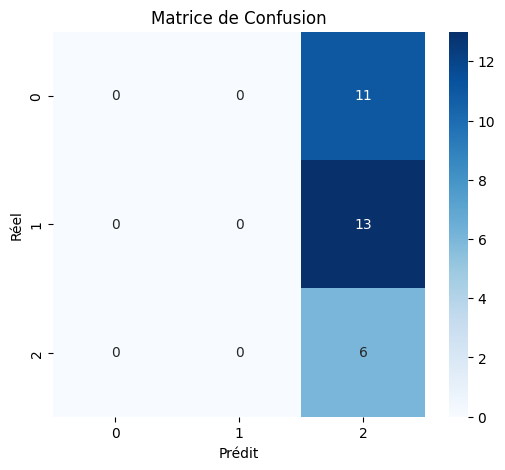

In [163]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()

def afficher_frontiere_decision(X, y, model, feature_names):
    """Affiche la frontière de décision."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF sur Iris (2 premières caractéristiques)")
    plt.show()

# Affichage de la matrice de confusion
afficher_matrice_confusion(cm, np.unique(y))



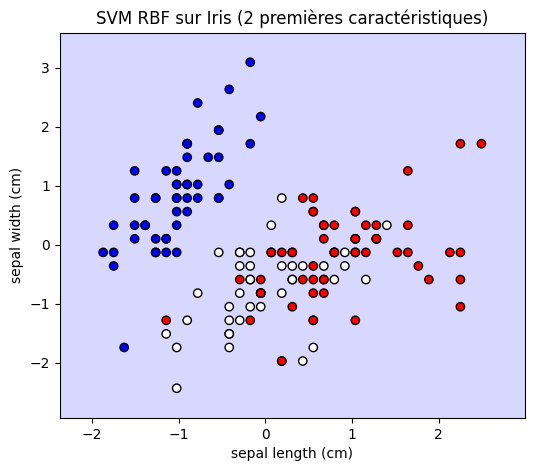

In [164]:
#Affichage de la frontière de décision
afficher_frontiere_decision(X, y, svm, iris.feature_names)